In [133]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
(x_data,y_data),(t_x_data,t_y_data) =load_data()

In [134]:
x_data.shape

(60000, 28, 28)

In [135]:
np.unique(y_data)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

목적 CNN분류기
1. 모델을 만들어 주세요
    - 컨벌루션 2층
    - 뉴런은 최소 1층
    - 형상 출력
2. 학습
    - 최적의 모델을 저장하시오
    - 조건을 부여하여 학습의 진행을 정기 시켜라
    - 검증 data를 이용하여 점수를 도출 하시오
3. 시각화
    - 테스트 data를 이용하여 입력을 통한 결과 출력을 시각화 하시오
    - 테스트 data를 이용하여 점수를 도출하시오
4. 피쳐 검토
    - 학습된 모델을 이용하여 컨벌루션 층의 피처들을 시각화 하시오.

In [136]:
#1, 모델을 만들어 주세요
x_data = x_data.reshape(-1,28,28,1)/255.0
tt_x = t_x_data.reshape(-1,28,28,1)/255.0
tt_y = t_y_data
t_x,v_x, t_y, v_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [137]:
m = keras.Sequential()#모델 생성
#컨벌루션 층
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',
                         input_shape= (28,28,1)))#컨벌류션 1층
m.add(keras.layers.MaxPool2D(2))
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),
                          activation='relu',padding='same'))#컨벌루션2층
m.add(keras.layers.MaxPool2D(2))


In [138]:
#뉴럴층
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',metrics='accuracy')
m.summary() #형상 출력

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_22 (Dense)            (None, 100)             

In [139]:
#2. 학습
#학습 조건 (저장, 정기)
ck_p = keras.callbacks.ModelCheckpoint('best_model.h5',save_best_only=True)
e_st = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
#학습하기
hy = m.fit(t_x,t_y, epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p,e_st])

Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2061 - accuracy: 0.9370 - val_loss: 0.0583 - val_accuracy: 0.9815
Epoch 2/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0773 - accuracy: 0.9775 - val_loss: 0.0442 - val_accuracy: 0.9860
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0381 - val_accuracy: 0.9894
Epoch 7/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0394 -

In [140]:
m.evaluate(v_x,v_y)

375/375 [==============================] - 2s 6ms/step - loss: 0.0364 - accuracy: 0.9902


[0.036358438432216644, 0.9902499914169312]

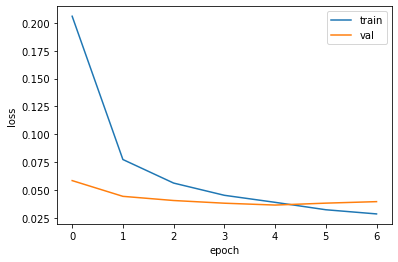

In [141]:
#3. 시각화
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [142]:
m.evaluate(tt_x,tt_y)#테스트

313/313 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9916


[0.02855515666306019, 0.991599977016449]

In [143]:
#4. 학습된 모델 불러오기
m2 = keras.models.load_model('best_model.h5')
conv = m2.layers[0]
conv.weights[0].shape, conv.weights[1].shape

w = conv.weights[0].numpy()


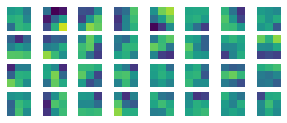

In [144]:
fig, axs = plt.subplots(4,8,figsize = (5,2))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(w[:,:,0,i*8+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

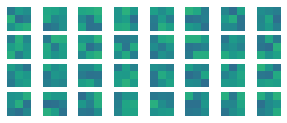

In [145]:
n_m = keras.Sequential()
n_m.add(keras.layers.Conv2D(32, kernel_size=3,activation='relu',padding='same'
                           ,input_shape=(28,28,1)))

n_conv= n_m.layers[0]
n_w=n_conv.weights[0].numpy()
fig, axs = plt.subplots(4,8,figsize = (5,2))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(n_w[:,:,0,i*8+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

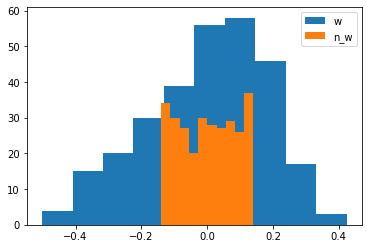

In [146]:
plt.hist(w.reshape(-1,1))
plt.hist(n_w.reshape(-1,1))
plt.legend(['w','n_w'])
plt.show()

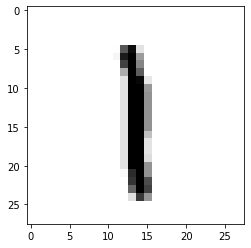

In [147]:
cov_act1=keras.Model(m.input,m.layers[0].output)
plt.imshow(x_data[14],cmap='gray_r')

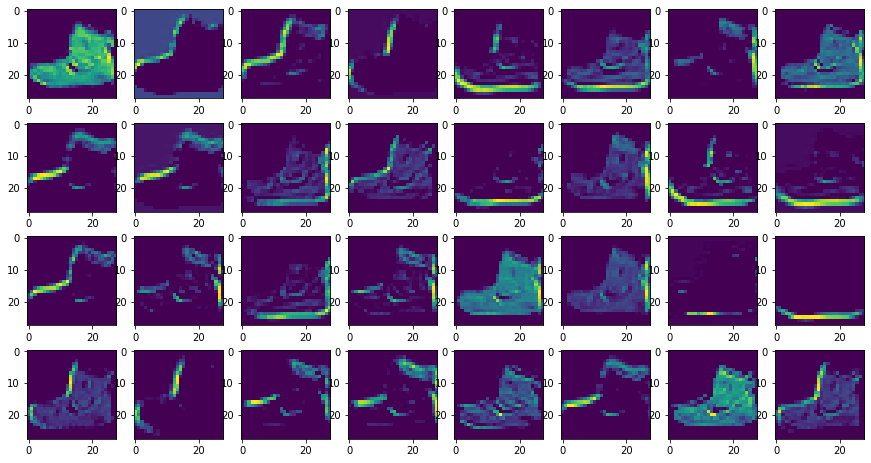

In [149]:
f_map = cov_act1.predict(in_data[0:1])
ig, axs = plt.subplots(4,8,figsize = (15,8))#피쳐맵에 맞게 플롯수 조정
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(f_map[0,:,:,i*8+j])